// link from github
// import stmts
// EDA
// encoding, normalization
// fit and predict
// models to use:
// k means clustering
// hierarchical clustering
// dbscan
// gmm
// neural network
// logistic regression
// svm

### Step 1: Upload the file to Colab

Run the following code cell. It will provide a button to choose and upload your file from your local computer. After uploading, the file will be accessible in the Colab environment.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train_dataset.csv to train_dataset.csv


### Step 2: Read the uploaded file into a Pandas DataFrame

Once the file is uploaded, you can read it using `pd.read_csv()`. You'll need to specify the correct filename (e.g., `train_dataset.csv`).


In [ ]:
import pandas as pd
import io

# Assuming you uploaded 'train_dataset.csv'
# Replace 'train_dataset.csv' with the actual name of your uploaded file
file_name = next(iter(uploaded)) # Gets the name of the first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

display(df.head())

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
print(df.shape)
df.info()
df.isnull().sum()

(38984, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           389

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


In [ ]:
df.duplicated().sum()

np.int64(5517)

In [ ]:
df.drop_duplicates()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38978,40,170,65,77.0,1.5,1.5,1,1,110,62,...,79,91,16.1,1,0.9,28,43,36,1,1
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [ ]:
print(df.columns.tolist())

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


In [ ]:
cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
        'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine',
        'AST', 'ALT', 'Gtp', 'dental caries']
target_col = ['smoking']


                age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38984.000000  38984.000000  38984.000000  38984.000000    38984.000000   
mean      44.127591    164.689488     65.938718     82.062115        1.014955   
std       12.063564      9.187507     12.896581      9.326798        0.498527   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38984.000000   38984.000000    38984.000000  38984.000000   
mean          1.008768       1.025369        1.026190    121.475631   
std           0.493813       0.157246        0.159703    

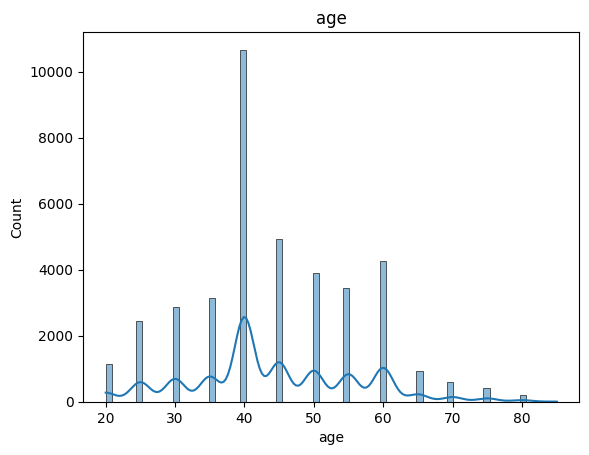

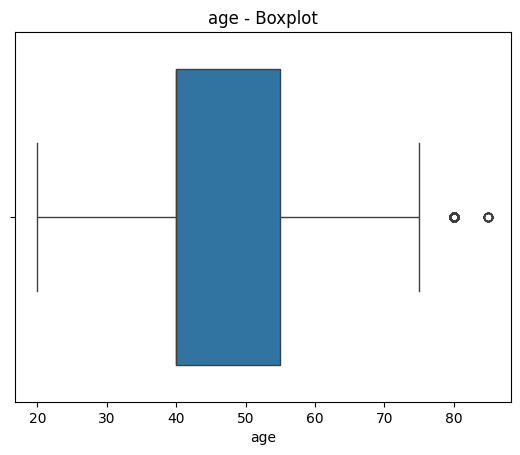

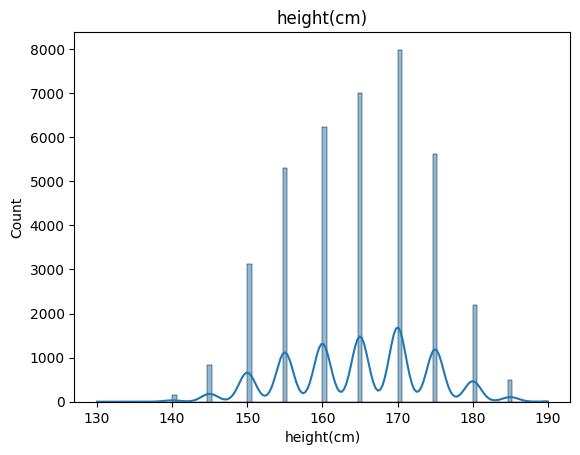

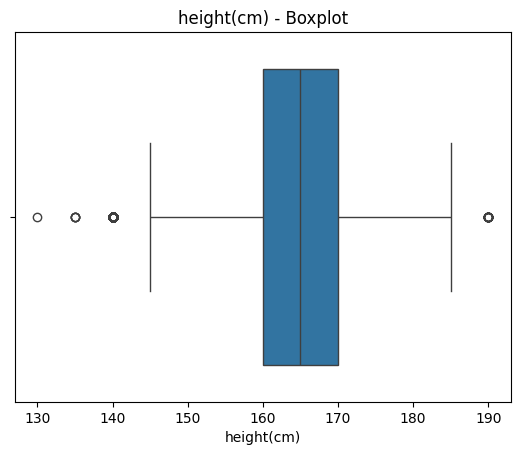

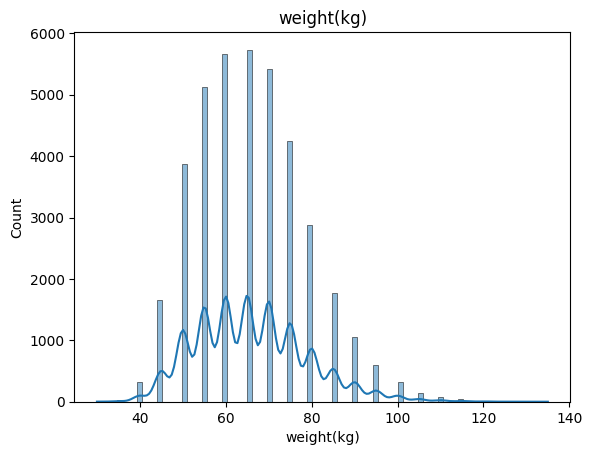

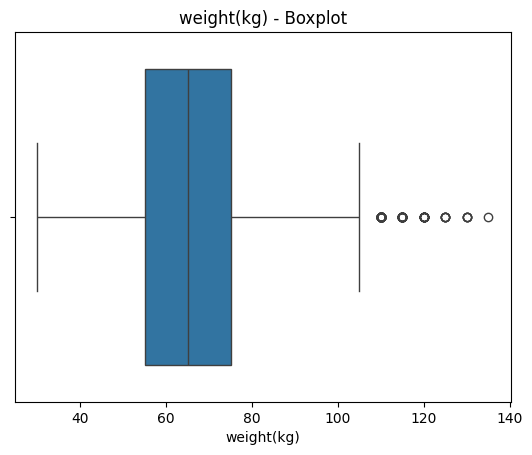

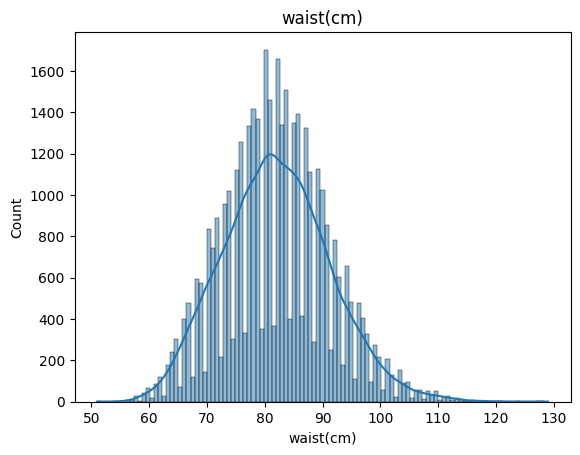

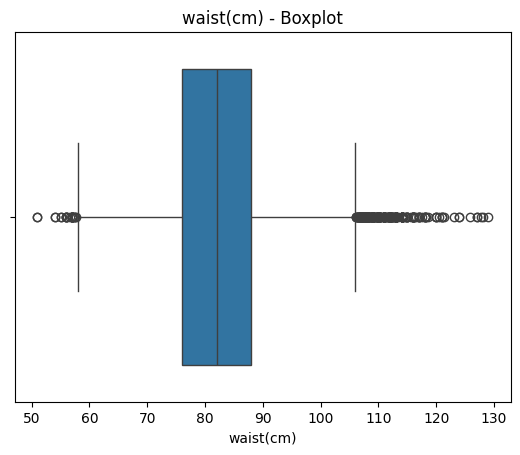

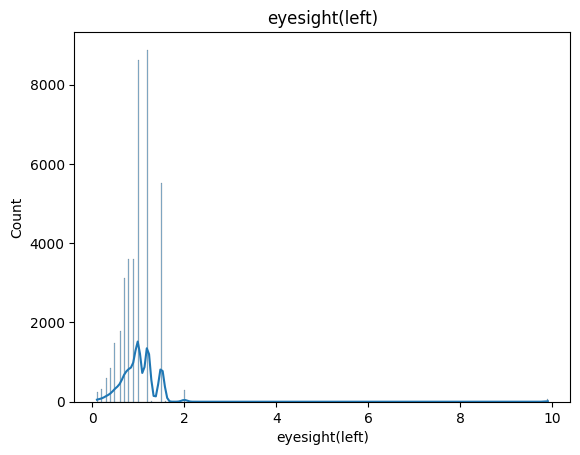

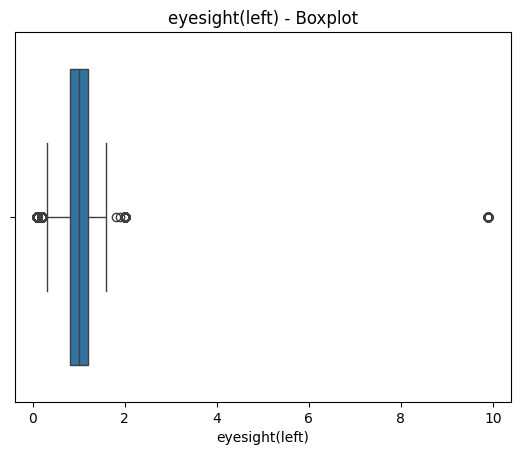

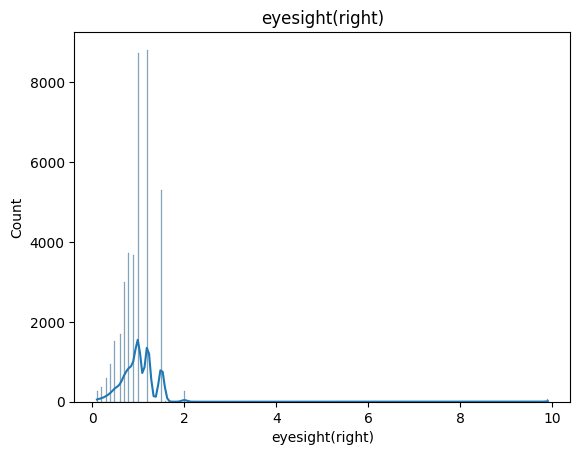

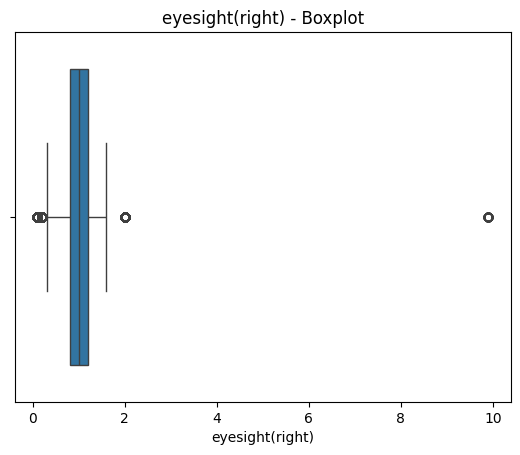

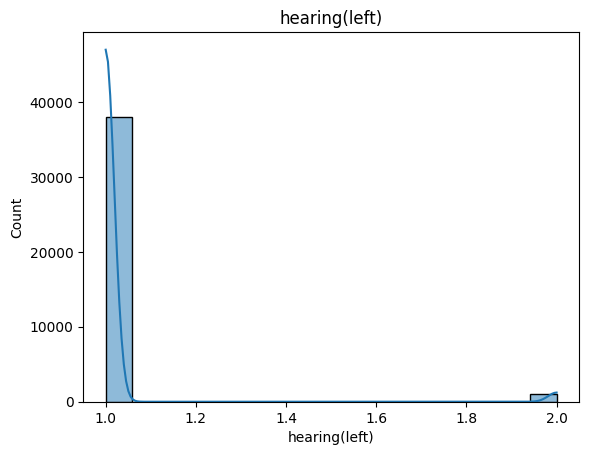

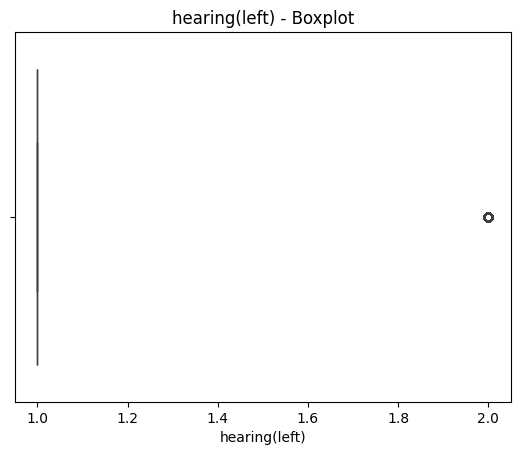

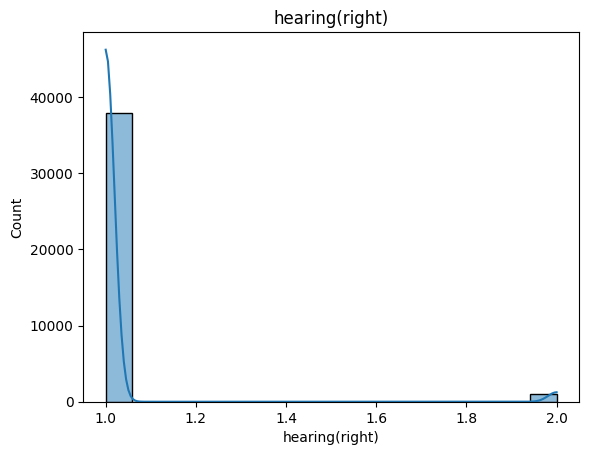

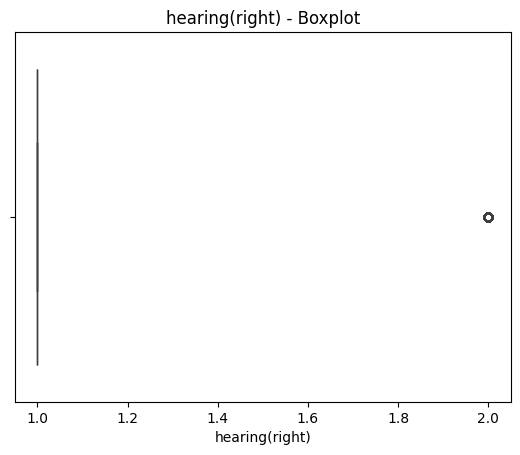

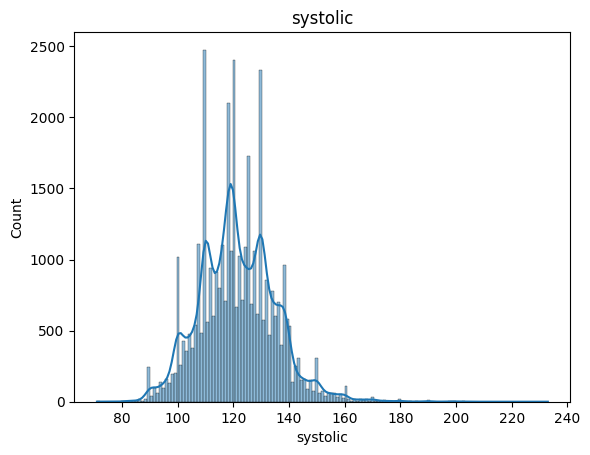

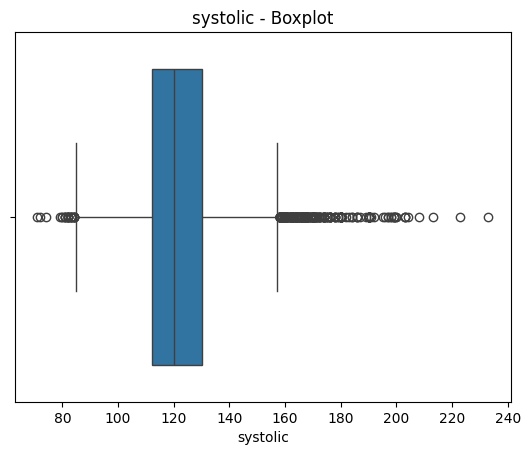

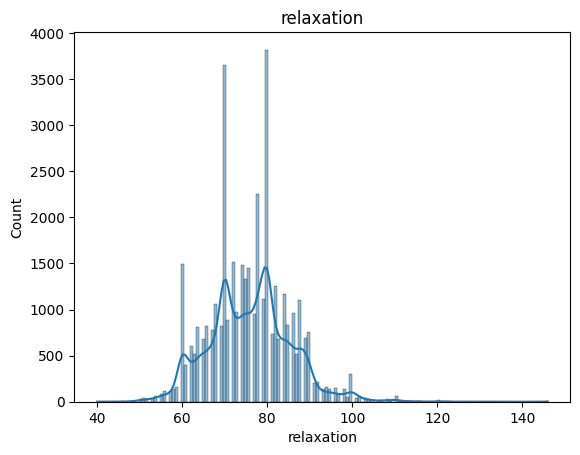

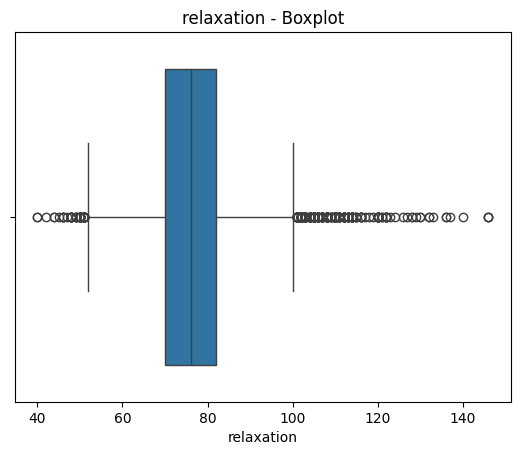

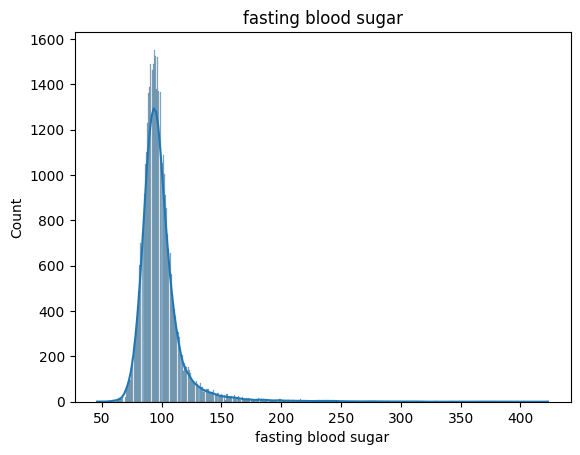

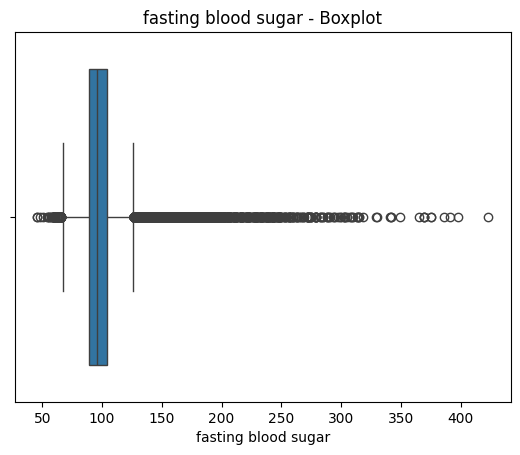

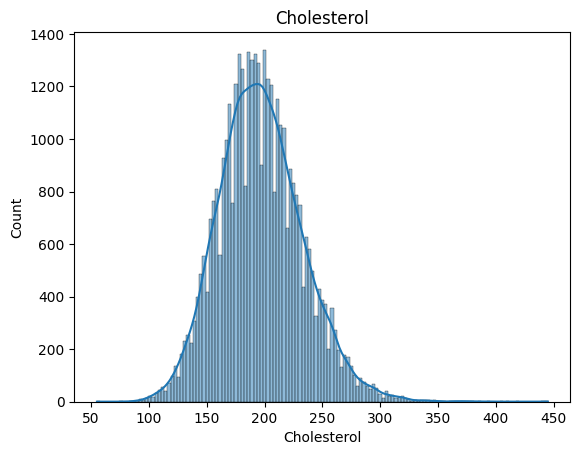

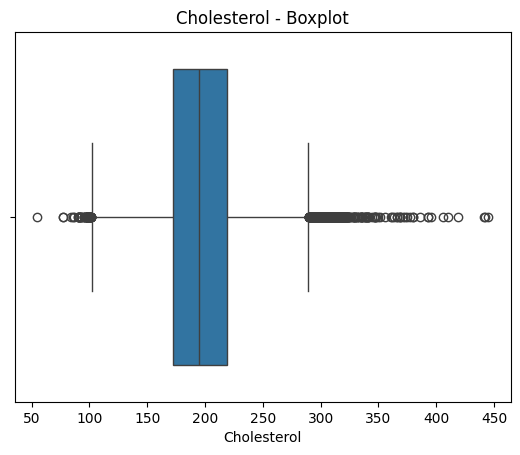

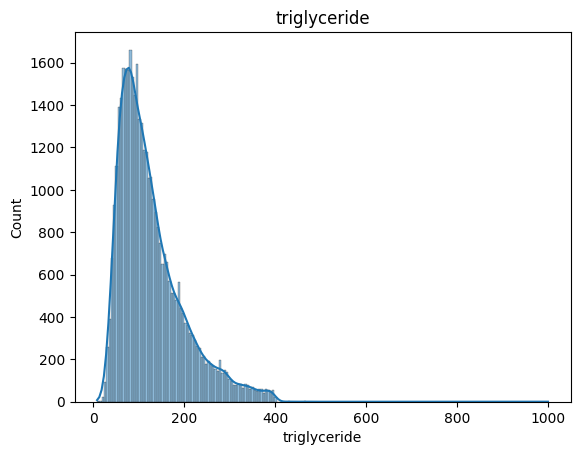

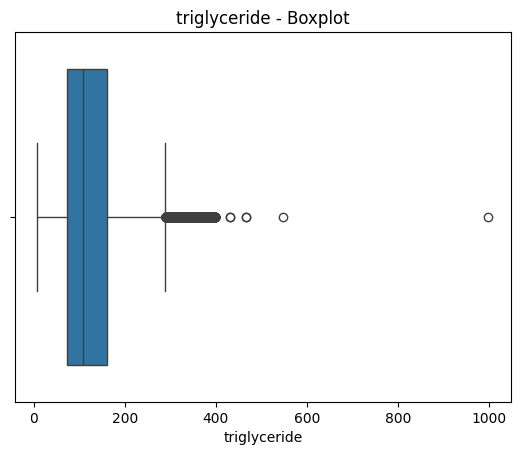

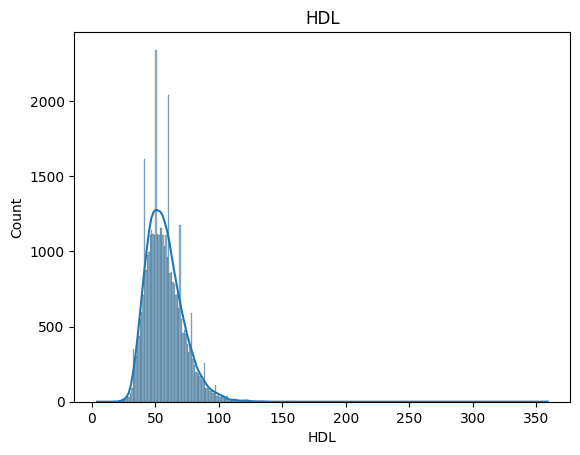

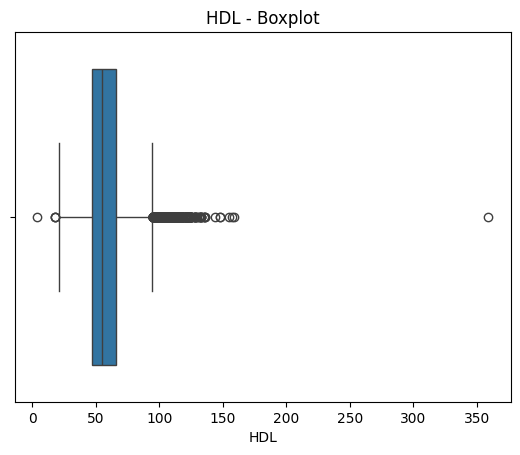

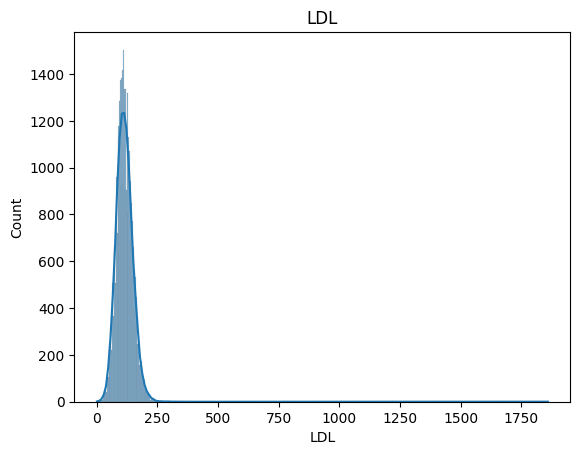

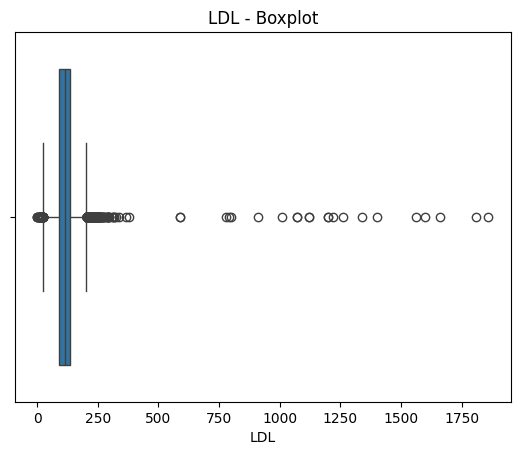

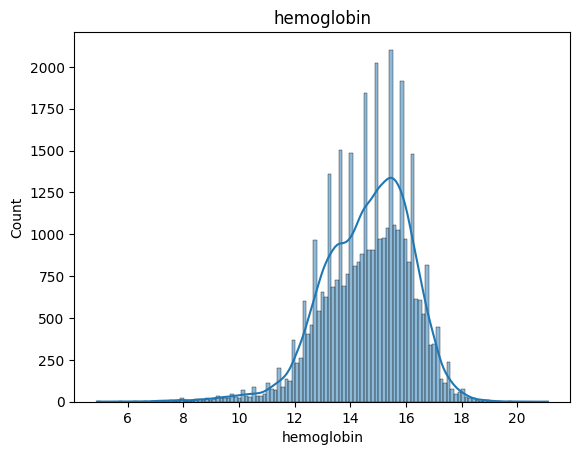

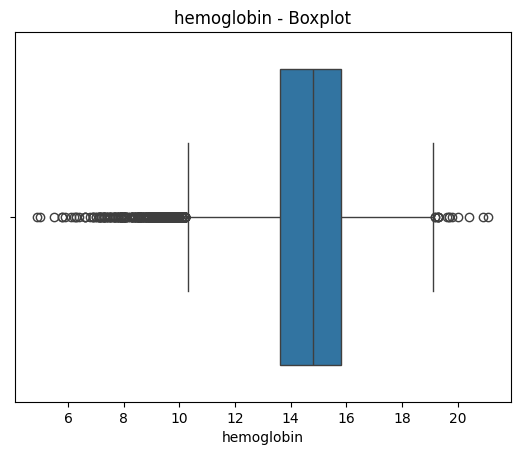

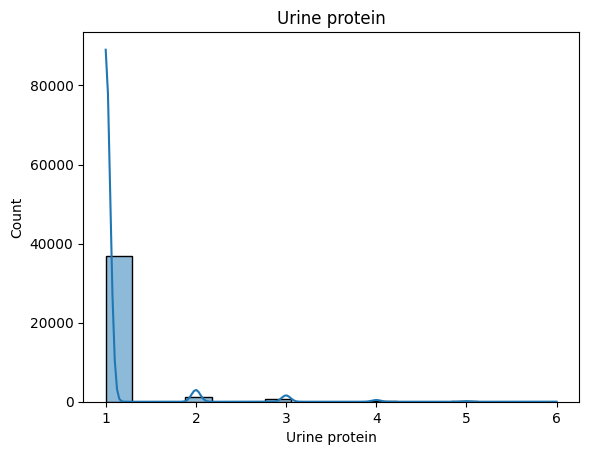

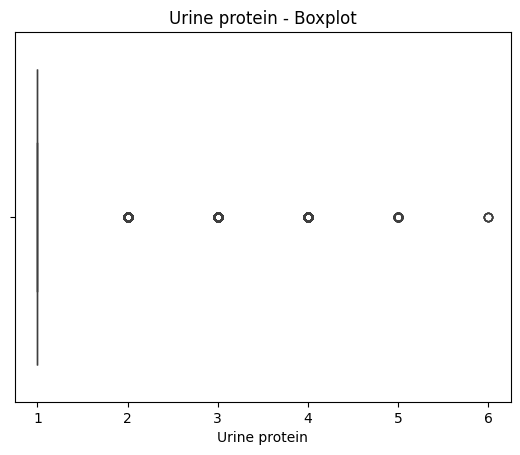

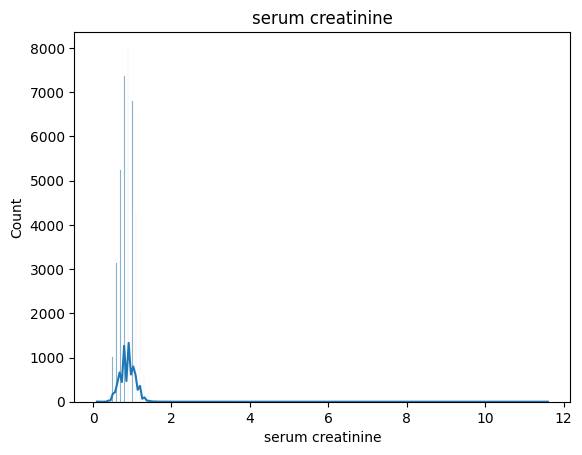

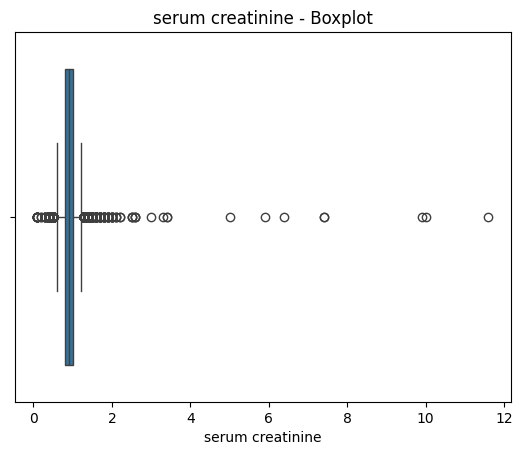

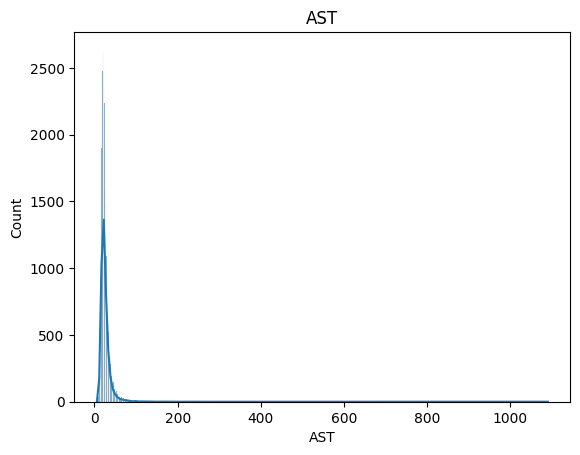

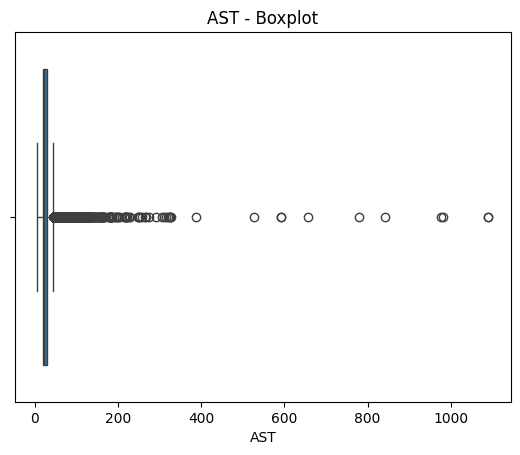

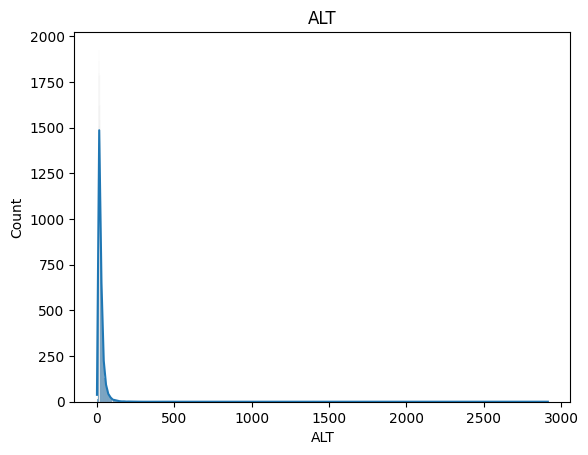

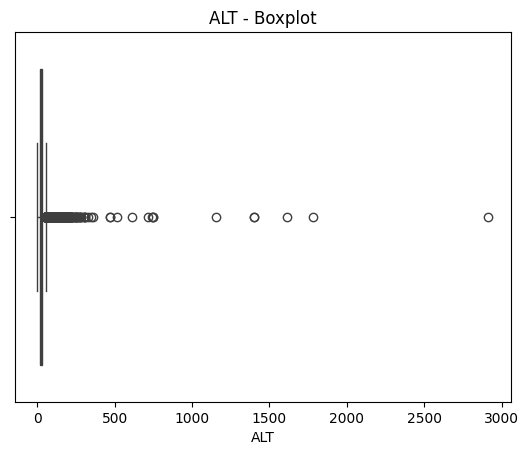

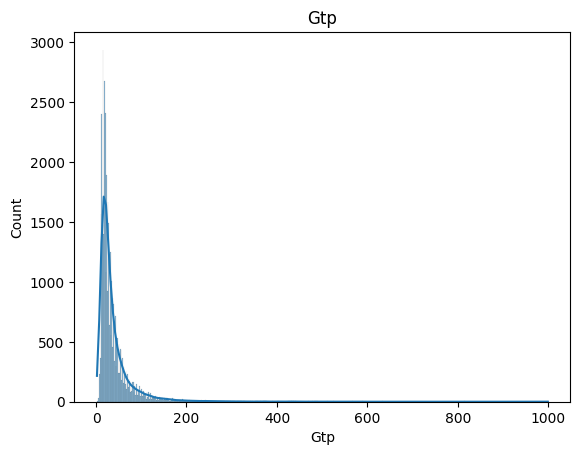

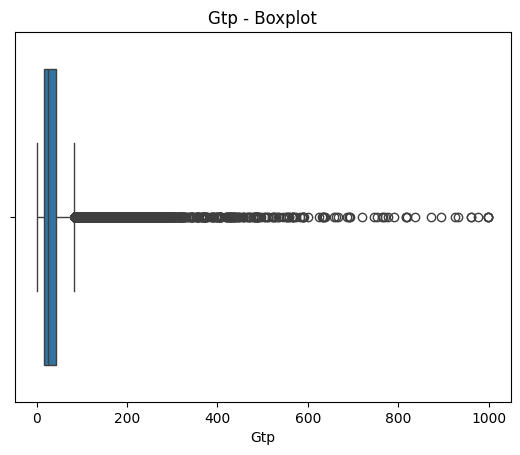

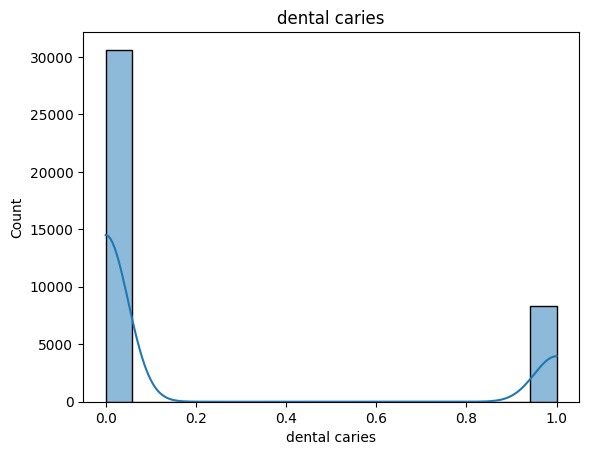

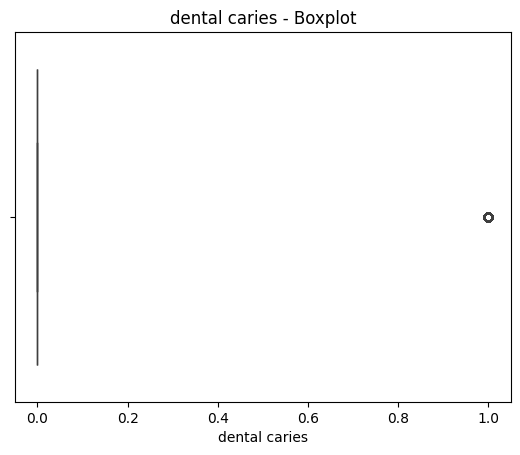

In [ ]:
print(df[cols].describe())

for col in cols:
    sb.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

    sb.boxplot(x=df[col])
    plt.title(col + " - Boxplot")
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler


def preprocess_health_dataset(df):
   """
   Applies data preprocessing treatments recommended in the project PDF.


   Treatments applied:
   1. Cleaning: Fixes '9.9' error codes in Eyesight.
   2. Encoding: Converts Hearing (1/2) to Binary (0/1).
   3. Categorical: Converts Urine Protein to binary/category.
   4. Log Transform: Handles right-skewed features like Enzymes and Sugar.
   5. Robust Scaling: Handles features with rounding bias or outliers (Systolic, HDL).
   6. Standard Scaling: Handles normal distributions (Height, Weight, Hemoglobin, etc.).
   """


   # Create a copy to avoid SettingWithCopy warnings
   df_clean = df.copy()


   # ---------------------------------------------------------
   # 1. DATA CLEANING & BINARY CONVERSION
   # ---------------------------------------------------------


   # Feature: Eyesight (right/left)
   # Diagnosis: Encoding Error (9.9). Treatment: Replace 9.9 with Median.
   for col in ['eyesight(right)', 'eyesight(left)']:
       if col in df_clean.columns:
           # Calculate median excluding the 9.9 error code
           median_val = df_clean.loc[df_clean[col] != 9.9, col].median()
           df_clean[col] = np.where(df_clean[col] == 9.9, median_val, df_clean[col])


   # Feature: Hearing (left/right)
   # Diagnosis: Binary (1 vs 2). Treatment: Convert to 0/1. Do not scale.
   for col in ['hearing(left)', 'hearing(right)']:
       if col in df_clean.columns:
           df_clean[col] = df_clean[col].map({1: 0, 2: 1})


   # Feature: Dental caries
   # Diagnosis: Binary (0/1). Treatment: Do Nothing (Ensure type is int).
   if 'dental caries' in df_clean.columns:
       df_clean['dental caries'] = df_clean['dental caries'].astype(int)


   # Feature: Urine protein
   # Diagnosis: Ordinal. Treatment: Convert to Binary (Normal/Abnormal).
   # (Assuming 1 is Normal and >1 is Abnormal/Proteinuria)
   if 'Urine protein' in df_clean.columns:
       df_clean['urine_protein_abnormal'] = (df_clean['Urine protein'] > 1).astype(int)


   # ---------------------------------------------------------
   # 2. LOG TRANSFORMATION (Right-Skewed Data)
   # ---------------------------------------------------------
   # Diagnosis: Extreme Skew / Right Skew. Treatment: Log Transform (np.log1p).


   skewed_features = [
       'Triglyceride',
       'serum creatinine',
       'LDL',
       'Gtp',
       'fasting blood sugar',
       'ALT',
       'AST'
   ]


   for col in skewed_features:
       if col in df_clean.columns:
           # Apply Log(1+x) to handle skew and zero values
           df_clean[f'log_{col}'] = np.log1p(df_clean[col])
           # Optional: Drop original columns if you only want the transformed versions
           # df_clean.drop(columns=[col], inplace=True)


   # ---------------------------------------------------------
   # 3. ROBUST SCALING (Outlier/Rounding Bias)
   # ---------------------------------------------------------
   # Diagnosis: Rounding Bias / Mild Skew with Outliers. Treatment: Robust Scaler.


   robust_features = [
       'systolic',
       'HDL',
       'waist(cm)',
       'weight(kg)',
       'hemoglobin',
       'height(cm)',
       'Cholesterol',
       'age',
       'relaxation'
   ]


   # Only scale features that exist in the dataframe
   robust_cols_to_scale = [col for col in robust_features if col in df_clean.columns]


   if robust_cols_to_scale:
       r_scaler = RobustScaler()
       # Create new scaled columns (e.g., systolic_scaled)
       for col in robust_cols_to_scale:
           df_clean[f'{col}_scaled'] = r_scaler.fit_transform(df_clean[[col]])


   # ---------------------------------------------------------
   # 4. STANDARD SCALING (Normal/Mild Skew)
   # ---------------------------------------------------------
   # Diagnosis: Normal Distribution / Mild Skew. Treatment: Standard Scaler.


  #  standard_features = [

  #  ]


  #  # Only scale features that exist in the dataframe
  #  std_cols_to_scale = [col for col in standard_features if col in df_clean.columns]


  #  if std_cols_to_scale:
  #      s_scaler = StandardScaler()
  #      # Create new scaled columns
  #      for col in std_cols_to_scale:
  #          df_clean[f'{col}_scaled'] = s_scaler.fit_transform(df_clean[[col]])


   return df_clean


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder

df_processed = preprocess_health_dataset(df)
X = df_processed.drop('smoking', axis=1)
y = df_processed['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)